In [1]:
import keras
from keras.models import Sequential
from keras.layers.recurrent import SimpleRNN
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = """Jack and jill went up the hill
to fetch a pail of water
jack fell down and broke his crown
and jill came tumbling after"""

In [3]:
data

'Jack and jill went up the hill\nto fetch a pail of water\njack fell down and broke his crown\nand jill came tumbling after'

In [4]:
tokenizer = keras.preprocessing.text.Tokenizer()

In [5]:
tokenizer.fit_on_texts([data])

In [6]:
encoded = tokenizer.texts_to_sequences([data])[0]

In [7]:
encoded

[2,
 1,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 2,
 14,
 15,
 1,
 16,
 17,
 18,
 1,
 3,
 19,
 20,
 21]

In [8]:
tokenizer.word_index

{'and': 1,
 'jack': 2,
 'jill': 3,
 'went': 4,
 'up': 5,
 'the': 6,
 'hill': 7,
 'to': 8,
 'fetch': 9,
 'a': 10,
 'pail': 11,
 'of': 12,
 'water': 13,
 'fell': 14,
 'down': 15,
 'broke': 16,
 'his': 17,
 'crown': 18,
 'came': 19,
 'tumbling': 20,
 'after': 21}

# One word in one word out

In [ ]:
sequences = list()

In [ ]:
for i in range(1, len(encoded)):
    sequence = encoded[i-1:i+1]
    sequences.append(sequence)

In [ ]:
sequences

In [ ]:
len(sequences)

In [ ]:
sequences = np.array(sequences)

In [ ]:
X,y=sequences[:,0], sequences[:,1]

In [ ]:
X

In [ ]:
y

In [ ]:
y = keras.utils.to_categorical(y)

In [ ]:
y.shape

In [ ]:
vocab_size = len(tokenizer.word_index)

In [ ]:
vocab_size

In [ ]:
X = X.reshape(X.shape[0], 1, 1)

In [ ]:
X

In [ ]:
X.shape

## Creating a simple RNN model

In [ ]:
model = Sequential()

In [ ]:
model.add(SimpleRNN(32, input_shape = (1,1), return_sequences = True))
model.add(SimpleRNN(32, input_shape = (1,1), return_sequences = False))
#model.add(keras.layers.Dense(vocab_size*2, activation = 'relu'))
model.add(keras.layers.Dense(vocab_size+1, activation = 'softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X,y, epochs = 3000, verbose = 2)

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
plt.plot(history.history['accuracy'])

## Testing out the model

In [ ]:
in_text = 'jack'
encoded = tokenizer.texts_to_sequences([in_text])[0]
encoded = np.array(encoded)

In [ ]:
encoded

In [ ]:
yhat = model.predict_classes(encoded.reshape(encoded.shape[0], 1, 1))

In [ ]:
yhat

In [ ]:
for word, index in tokenizer.word_index.items():
    if index == yhat:
        print(word)

In [ ]:
data

In [ ]:
in_text = 'jill'
encoded = tokenizer.texts_to_sequences([in_text])[0]
encoded = np.array(encoded)
yhat = model.predict_classes(encoded.reshape(encoded.shape[0], 1, 1))
for word, index in tokenizer.word_index.items():
    if index == yhat:
        print(word)

In [ ]:
def seq_gen():
    in_text = 'jack'
    for i in range(10):
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        encoded = np.array(encoded)
        predictions = model.predict(encoded.reshape(encoded.shape[0], 1, 1))[0]
        random_choice = np.random.choice(predictions[1:])
        yhat = list(predictions[1:]).index(random_choice)
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                print(word)
                in_text = word

In [ ]:
seq_gen()

# Two words in one word out

In [21]:
encoded

[2,
 1,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 2,
 14,
 15,
 1,
 16,
 17,
 18,
 1,
 3,
 19,
 20,
 21]

In [22]:
sequences = list()

In [23]:
for i in range(2, len(encoded)):
    sequence = encoded[i-2:i+1]
    sequences.append(sequence)

In [24]:
sequences

[[2, 1, 3],
 [1, 3, 4],
 [3, 4, 5],
 [4, 5, 6],
 [5, 6, 7],
 [6, 7, 8],
 [7, 8, 9],
 [8, 9, 10],
 [9, 10, 11],
 [10, 11, 12],
 [11, 12, 13],
 [12, 13, 2],
 [13, 2, 14],
 [2, 14, 15],
 [14, 15, 1],
 [15, 1, 16],
 [1, 16, 17],
 [16, 17, 18],
 [17, 18, 1],
 [18, 1, 3],
 [1, 3, 19],
 [3, 19, 20],
 [19, 20, 21]]

In [25]:
sequences = np.array(sequences)

In [26]:
X, y = sequences[:,0:2], sequences[:,-1]

In [27]:
X

array([[ 2,  1],
       [ 1,  3],
       [ 3,  4],
       [ 4,  5],
       [ 5,  6],
       [ 6,  7],
       [ 7,  8],
       [ 8,  9],
       [ 9, 10],
       [10, 11],
       [11, 12],
       [12, 13],
       [13,  2],
       [ 2, 14],
       [14, 15],
       [15,  1],
       [ 1, 16],
       [16, 17],
       [17, 18],
       [18,  1],
       [ 1,  3],
       [ 3, 19],
       [19, 20]])

In [28]:
y

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  2, 14, 15,  1, 16, 17,
       18,  1,  3, 19, 20, 21])

In [29]:
len(sequences)

23

In [30]:
X.shape

(23, 2)

In [31]:
X = X.reshape(X.shape[0], X.shape[1],1)

In [32]:
X.shape

(23, 2, 1)

In [38]:
vocab_size = len(tokenizer.word_index)

In [34]:
y =  keras.utils.to_categorical(y)

In [35]:
y

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [36]:
y.shape

(23, 22)

In [48]:
model = Sequential()
model.add(SimpleRNN(32, input_shape = (2,1), return_sequences = False))
#model.add(SimpleRNN(32, input_shape = (1,1), return_sequences = False))
model.add(keras.layers.Dense(vocab_size*2, activation = 'relu'))
model.add(keras.layers.Dense(vocab_size+1, activation = 'softmax'))

In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 32)                1088      
_________________________________________________________________
dense_3 (Dense)              (None, 42)                1386      
_________________________________________________________________
dense_4 (Dense)              (None, 22)                946       
Total params: 3,420
Trainable params: 3,420
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics= ['accuracy'])
history = model.fit(X, y, epochs = 1000, verbose=2)

Epoch 1/1000
1/1 - 0s - loss: 3.2483 - accuracy: 0.0435
Epoch 2/1000
1/1 - 0s - loss: 3.2151 - accuracy: 0.0435
Epoch 3/1000
1/1 - 0s - loss: 3.1839 - accuracy: 0.0435
Epoch 4/1000
1/1 - 0s - loss: 3.1547 - accuracy: 0.0435
Epoch 5/1000
1/1 - 0s - loss: 3.1277 - accuracy: 0.0435
Epoch 6/1000
1/1 - 0s - loss: 3.1031 - accuracy: 0.0435
Epoch 7/1000
1/1 - 0s - loss: 3.0813 - accuracy: 0.0435
Epoch 8/1000
1/1 - 0s - loss: 3.0609 - accuracy: 0.0435
Epoch 9/1000
1/1 - 0s - loss: 3.0422 - accuracy: 0.0435
Epoch 10/1000
1/1 - 0s - loss: 3.0246 - accuracy: 0.0435
Epoch 11/1000
1/1 - 0s - loss: 3.0081 - accuracy: 0.0435
Epoch 12/1000
1/1 - 0s - loss: 2.9929 - accuracy: 0.0435
Epoch 13/1000
1/1 - 0s - loss: 2.9784 - accuracy: 0.0870
Epoch 14/1000
1/1 - 0s - loss: 2.9649 - accuracy: 0.0870
Epoch 15/1000
1/1 - 0s - loss: 2.9519 - accuracy: 0.0435
Epoch 16/1000
1/1 - 0s - loss: 2.9396 - accuracy: 0.0435
Epoch 17/1000
1/1 - 0s - loss: 2.9278 - accuracy: 0.0435
Epoch 18/1000
1/1 - 0s - loss: 2.9164 - 

Epoch 145/1000
1/1 - 0s - loss: 1.3597 - accuracy: 0.6087
Epoch 146/1000
1/1 - 0s - loss: 1.3521 - accuracy: 0.6087
Epoch 147/1000
1/1 - 0s - loss: 1.3444 - accuracy: 0.6522
Epoch 148/1000
1/1 - 0s - loss: 1.3369 - accuracy: 0.6522
Epoch 149/1000
1/1 - 0s - loss: 1.3298 - accuracy: 0.6522
Epoch 150/1000
1/1 - 0s - loss: 1.3227 - accuracy: 0.6522
Epoch 151/1000
1/1 - 0s - loss: 1.3158 - accuracy: 0.6522
Epoch 152/1000
1/1 - 0s - loss: 1.3089 - accuracy: 0.6522
Epoch 153/1000
1/1 - 0s - loss: 1.3021 - accuracy: 0.6522
Epoch 154/1000
1/1 - 0s - loss: 1.2952 - accuracy: 0.6522
Epoch 155/1000
1/1 - 0s - loss: 1.2884 - accuracy: 0.6522
Epoch 156/1000
1/1 - 0s - loss: 1.2816 - accuracy: 0.6522
Epoch 157/1000
1/1 - 0s - loss: 1.2749 - accuracy: 0.6522
Epoch 158/1000
1/1 - 0s - loss: 1.2683 - accuracy: 0.6522
Epoch 159/1000
1/1 - 0s - loss: 1.2617 - accuracy: 0.6522
Epoch 160/1000
1/1 - 0s - loss: 1.2554 - accuracy: 0.6522
Epoch 161/1000
1/1 - 0s - loss: 1.2490 - accuracy: 0.6522
Epoch 162/1000

Epoch 287/1000
1/1 - 0s - loss: 0.7731 - accuracy: 0.8696
Epoch 288/1000
1/1 - 0s - loss: 0.7706 - accuracy: 0.8696
Epoch 289/1000
1/1 - 0s - loss: 0.7677 - accuracy: 0.8696
Epoch 290/1000
1/1 - 0s - loss: 0.7650 - accuracy: 0.8696
Epoch 291/1000
1/1 - 0s - loss: 0.7624 - accuracy: 0.8696
Epoch 292/1000
1/1 - 0s - loss: 0.7598 - accuracy: 0.8696
Epoch 293/1000
1/1 - 0s - loss: 0.7572 - accuracy: 0.8696
Epoch 294/1000
1/1 - 0s - loss: 0.7547 - accuracy: 0.8696
Epoch 295/1000
1/1 - 0s - loss: 0.7521 - accuracy: 0.8696
Epoch 296/1000
1/1 - 0s - loss: 0.7496 - accuracy: 0.8696
Epoch 297/1000
1/1 - 0s - loss: 0.7471 - accuracy: 0.8696
Epoch 298/1000
1/1 - 0s - loss: 0.7446 - accuracy: 0.8696
Epoch 299/1000
1/1 - 0s - loss: 0.7423 - accuracy: 0.8696
Epoch 300/1000
1/1 - 0s - loss: 0.7397 - accuracy: 0.8696
Epoch 301/1000
1/1 - 0s - loss: 0.7372 - accuracy: 0.8696
Epoch 302/1000
1/1 - 0s - loss: 0.7349 - accuracy: 0.8696
Epoch 303/1000
1/1 - 0s - loss: 0.7328 - accuracy: 0.8696
Epoch 304/1000

Epoch 429/1000
1/1 - 0s - loss: 0.4987 - accuracy: 0.9130
Epoch 430/1000
1/1 - 0s - loss: 0.4974 - accuracy: 0.9130
Epoch 431/1000
1/1 - 0s - loss: 0.4957 - accuracy: 0.9130
Epoch 432/1000
1/1 - 0s - loss: 0.4944 - accuracy: 0.9130
Epoch 433/1000
1/1 - 0s - loss: 0.4930 - accuracy: 0.9130
Epoch 434/1000
1/1 - 0s - loss: 0.4918 - accuracy: 0.9130
Epoch 435/1000
1/1 - 0s - loss: 0.4903 - accuracy: 0.9130
Epoch 436/1000
1/1 - 0s - loss: 0.4889 - accuracy: 0.9130
Epoch 437/1000
1/1 - 0s - loss: 0.4875 - accuracy: 0.9130
Epoch 438/1000
1/1 - 0s - loss: 0.4862 - accuracy: 0.9130
Epoch 439/1000
1/1 - 0s - loss: 0.4852 - accuracy: 0.9130
Epoch 440/1000
1/1 - 0s - loss: 0.4838 - accuracy: 0.9130
Epoch 441/1000
1/1 - 0s - loss: 0.4825 - accuracy: 0.9130
Epoch 442/1000
1/1 - 0s - loss: 0.4811 - accuracy: 0.9130
Epoch 443/1000
1/1 - 0s - loss: 0.4800 - accuracy: 0.9130
Epoch 444/1000
1/1 - 0s - loss: 0.4787 - accuracy: 0.9130
Epoch 445/1000
1/1 - 0s - loss: 0.4774 - accuracy: 0.9130
Epoch 446/1000

1/1 - 0s - loss: 0.3606 - accuracy: 0.9130
Epoch 571/1000
1/1 - 0s - loss: 0.3598 - accuracy: 0.9130
Epoch 572/1000
1/1 - 0s - loss: 0.3591 - accuracy: 0.9130
Epoch 573/1000
1/1 - 0s - loss: 0.3582 - accuracy: 0.9130
Epoch 574/1000
1/1 - 0s - loss: 0.3576 - accuracy: 0.9130
Epoch 575/1000
1/1 - 0s - loss: 0.3567 - accuracy: 0.9130
Epoch 576/1000
1/1 - 0s - loss: 0.3563 - accuracy: 0.9130
Epoch 577/1000
1/1 - 0s - loss: 0.3554 - accuracy: 0.9130
Epoch 578/1000
1/1 - 0s - loss: 0.3547 - accuracy: 0.9130
Epoch 579/1000
1/1 - 0s - loss: 0.3541 - accuracy: 0.9130
Epoch 580/1000
1/1 - 0s - loss: 0.3532 - accuracy: 0.9130
Epoch 581/1000
1/1 - 0s - loss: 0.3525 - accuracy: 0.9130
Epoch 582/1000
1/1 - 0s - loss: 0.3518 - accuracy: 0.9130
Epoch 583/1000
1/1 - 0s - loss: 0.3511 - accuracy: 0.9130
Epoch 584/1000
1/1 - 0s - loss: 0.3504 - accuracy: 0.9130
Epoch 585/1000
1/1 - 0s - loss: 0.3495 - accuracy: 0.9130
Epoch 586/1000
1/1 - 0s - loss: 0.3492 - accuracy: 0.9130
Epoch 587/1000
1/1 - 0s - los

Epoch 712/1000
1/1 - 0s - loss: 0.2688 - accuracy: 0.9130
Epoch 713/1000
1/1 - 0s - loss: 0.2681 - accuracy: 0.9130
Epoch 714/1000
1/1 - 0s - loss: 0.2675 - accuracy: 0.9130
Epoch 715/1000
1/1 - 0s - loss: 0.2670 - accuracy: 0.9130
Epoch 716/1000
1/1 - 0s - loss: 0.2665 - accuracy: 0.9130
Epoch 717/1000
1/1 - 0s - loss: 0.2661 - accuracy: 0.9130
Epoch 718/1000
1/1 - 0s - loss: 0.2654 - accuracy: 0.9130
Epoch 719/1000
1/1 - 0s - loss: 0.2646 - accuracy: 0.9130
Epoch 720/1000
1/1 - 0s - loss: 0.2645 - accuracy: 0.9130
Epoch 721/1000
1/1 - 0s - loss: 0.2641 - accuracy: 0.9130
Epoch 722/1000
1/1 - 0s - loss: 0.2639 - accuracy: 0.9130
Epoch 723/1000
1/1 - 0s - loss: 0.2637 - accuracy: 0.9130
Epoch 724/1000
1/1 - 0s - loss: 0.2623 - accuracy: 0.9130
Epoch 725/1000
1/1 - 0s - loss: 0.2627 - accuracy: 0.9130
Epoch 726/1000
1/1 - 0s - loss: 0.2619 - accuracy: 0.9130
Epoch 727/1000
1/1 - 0s - loss: 0.2613 - accuracy: 0.9130
Epoch 728/1000
1/1 - 0s - loss: 0.2605 - accuracy: 0.9130
Epoch 729/1000

Epoch 854/1000
1/1 - 0s - loss: 0.2040 - accuracy: 0.9130
Epoch 855/1000
1/1 - 0s - loss: 0.2027 - accuracy: 0.9130
Epoch 856/1000
1/1 - 0s - loss: 0.2027 - accuracy: 0.9130
Epoch 857/1000
1/1 - 0s - loss: 0.2025 - accuracy: 0.9130
Epoch 858/1000
1/1 - 0s - loss: 0.2020 - accuracy: 0.9130
Epoch 859/1000
1/1 - 0s - loss: 0.2021 - accuracy: 0.9130
Epoch 860/1000
1/1 - 0s - loss: 0.2013 - accuracy: 0.9130
Epoch 861/1000
1/1 - 0s - loss: 0.2012 - accuracy: 0.9130
Epoch 862/1000
1/1 - 0s - loss: 0.2002 - accuracy: 0.9130
Epoch 863/1000
1/1 - 0s - loss: 0.1999 - accuracy: 0.9130
Epoch 864/1000
1/1 - 0s - loss: 0.1996 - accuracy: 0.9130
Epoch 865/1000
1/1 - 0s - loss: 0.1992 - accuracy: 0.9130
Epoch 866/1000
1/1 - 0s - loss: 0.1988 - accuracy: 0.9130
Epoch 867/1000
1/1 - 0s - loss: 0.1985 - accuracy: 0.9130
Epoch 868/1000
1/1 - 0s - loss: 0.1980 - accuracy: 0.9130
Epoch 869/1000
1/1 - 0s - loss: 0.1975 - accuracy: 0.9130
Epoch 870/1000
1/1 - 0s - loss: 0.1978 - accuracy: 0.9130
Epoch 871/1000

Epoch 996/1000
1/1 - 0s - loss: 0.1618 - accuracy: 0.9565
Epoch 997/1000
1/1 - 0s - loss: 0.1611 - accuracy: 0.9565
Epoch 998/1000
1/1 - 0s - loss: 0.1614 - accuracy: 0.9565
Epoch 999/1000
1/1 - 0s - loss: 0.1609 - accuracy: 0.9565
Epoch 1000/1000
1/1 - 0s - loss: 0.1604 - accuracy: 0.9565


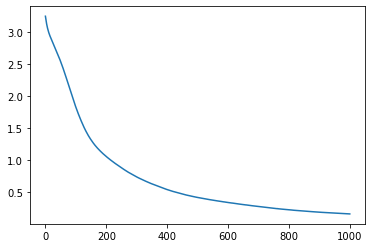

In [51]:
plt.plot(history.history['loss'])

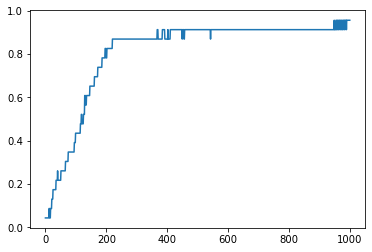

In [52]:
plt.plot(history.history['accuracy'])

## Test the model

In [53]:
data

'Jack and jill went up the hill\nto fetch a pail of water\njack fell down and broke his crown\nand jill came tumbling after'

In [54]:
in_text = "jill went"
encoded = tokenizer.texts_to_sequences([in_text])[0]
encoded = np.array(encoded)

In [55]:
encoded

array([3, 4])

In [56]:
encoded.shape

(2,)

In [57]:
encoded = encoded.reshape(1,encoded.shape[0],1)

In [58]:
encoded.shape

(1, 2, 1)

In [61]:
yhat = model.predict_classes(encoded)

In [62]:
yhat

array([5], dtype=int64)

In [63]:
tokenizer.word_index

{'and': 1,
 'jack': 2,
 'jill': 3,
 'went': 4,
 'up': 5,
 'the': 6,
 'hill': 7,
 'to': 8,
 'fetch': 9,
 'a': 10,
 'pail': 11,
 'of': 12,
 'water': 13,
 'fell': 14,
 'down': 15,
 'broke': 16,
 'his': 17,
 'crown': 18,
 'came': 19,
 'tumbling': 20,
 'after': 21}

In [67]:
in_text = "pail of"
encoded = tokenizer.texts_to_sequences([in_text])[0]
encoded = np.array(encoded)
encoded = encoded.reshape(1,encoded.shape[0],1)
yhat = model.predict_classes(encoded)
for word, index in tokenizer.word_index.items():
    if index == yhat:
        print(word)

water
